In [16]:
import os
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS
import nltk
from nltk.corpus import stopwords
from collections import Counter
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation, PCA, TruncatedSVD
from sklearn.manifold import TSNE
from langchain_openai import OpenAIEmbeddings
import plotly.express as px
import warnings

In [ ]:
DATA_SOURCES_PATH = 'data_sources/'

In [5]:
# --- Step 1: Load Data into a Pandas DataFrame ---
print("Step 1: Loading data...")

# --- Defensive Check: Ensure the data directory exists ---
if not os.path.isdir(DATA_SOURCES_PATH):
    print(f"Error: The directory '{DATA_SOURCES_PATH}' was not found.")
    print("Please make sure you have created the 'data_sources' folder and it's in the same directory as this notebook.")
    # Stop execution if the directory is missing
    sys.exit()

data = []
# Loop through each file in the data_sources directory
file_list = os.listdir(DATA_SOURCES_PATH)

if not file_list:
    print(f"Warning: The directory '{DATA_SOURCES_PATH}' is empty.")
    print("Please add your .txt data files to this folder.")
else:
    for filename in file_list:
        if filename.endswith('.txt'):
            # Extract the disease name from the filename
            disease_name = filename.replace('.txt', '').replace('_', ' ').title()
            # Open and read the file content
            with open(os.path.join(DATA_SOURCES_PATH, filename), 'r', encoding='utf-8') as f:
                text = f.read()
                data.append({'disease_name': disease_name, 'text': text})

# Create a Pandas DataFrame
df = pd.DataFrame(data)
if not df.empty:
    print(f"Loaded {len(df)} documents successfully.")
    print(df.head())
else:
    print("No documents were loaded into the DataFrame.")

print("\n" + "="*50 + "\n")

Step 1: Loading data...
Loaded 20 documents successfully.
        disease_name                                               text
0       Lyme Disease  Lyme disease is caused by the bacterium Borrel...
1      Kidney Stones  Kidney stones are hard deposits made of minera...
2  Diabetes Mellitus  Type 2 diabetes is a chronic condition that af...
3       Appendicitis  Appendicitis is the inflammation of the append...
4     Conjunctivitis  Conjunctivitis is an inflammation or infection...




Step 2: Performing Corpus Statistics...


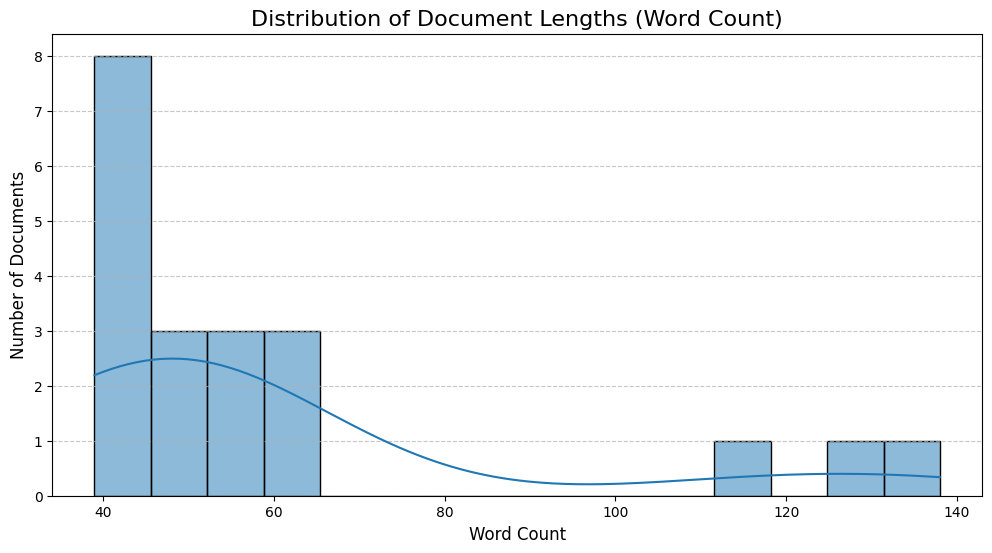

Corpus Statistics:
count     20.000000
mean      60.150000
std       29.437311
min       39.000000
25%       43.000000
50%       48.000000
75%       59.500000
max      138.000000
Name: word_count, dtype: float64




In [6]:
# --- Step 2: Corpus Statistics (Text Analytics) ---
print("Step 2: Performing Corpus Statistics...")

# Calculate word count for each document
if not df.empty:
    df['word_count'] = df['text'].apply(lambda x: len(x.split()))

    # --- Visualization 1: Document Length Histogram ---
    plt.figure(figsize=(12, 6))
    sns.histplot(df['word_count'], bins=15, kde=True)
    plt.title('Distribution of Document Lengths (Word Count)', fontsize=16)
    plt.xlabel('Word Count', fontsize=12)
    plt.ylabel('Number of Documents', fontsize=12)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()

    print(f"Corpus Statistics:\n{df['word_count'].describe()}")
else:
    print("DataFrame is empty. Skipping corpus statistics.")

print("\n" + "="*50 + "\n")

Step 3: Performing Word Frequency Analysis...


/var/folders/x1/gzgg2vnx04q4lfl6wr_s0_j80000gn/T/ipykernel_89979/2819545125.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Frequency', y='Word', data=top_words_df, palette='viridis')


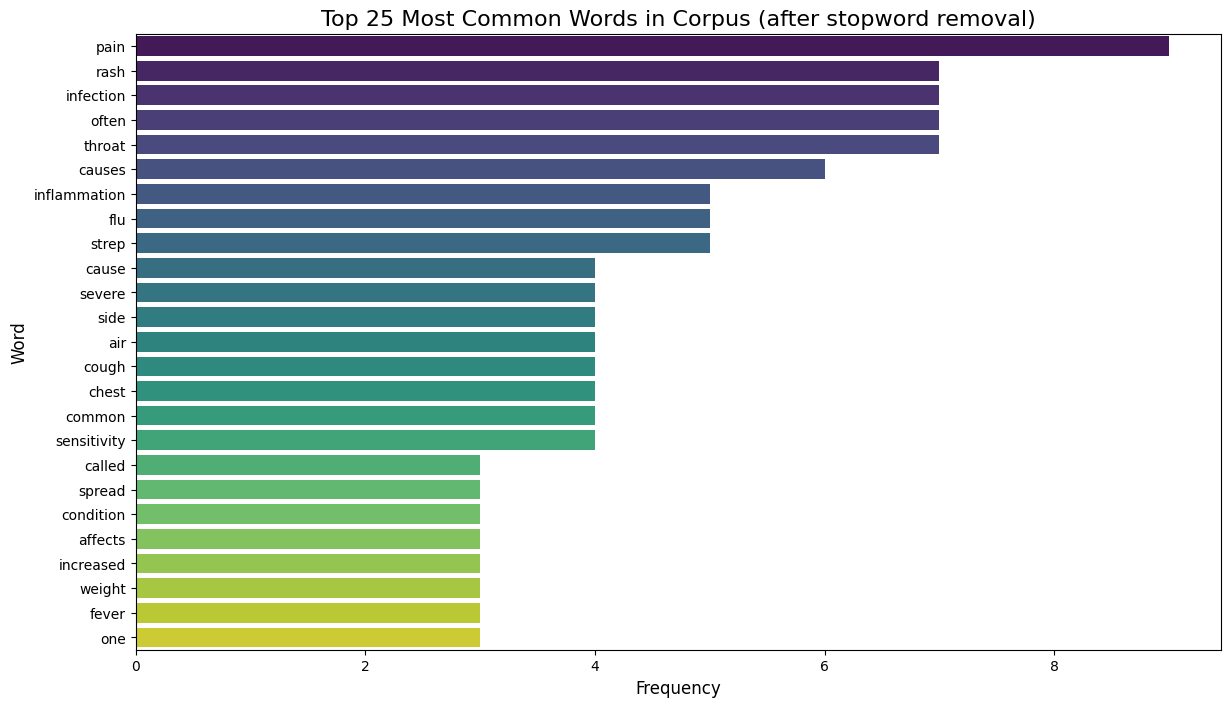

In [7]:
# --- Visualization 2: Word Frequency Analysis ---
print("Step 3: Performing Word Frequency Analysis...")

try:
    stopwords.words('english')
except LookupError:
    print("Downloading NLTK stopwords...")
    nltk.download('stopwords')

if not df.empty:
    # Combine all text into one large corpus
    full_text = ' '.join(df['text']).lower()

    # Get English stopwords
    stop_words = set(stopwords.words('english'))
    # Add custom words to stopwords if needed (e.g., common but uninteresting words)
    custom_stopwords = {'disease', 'symptoms', 'caused', 'people', 'may', 'can', 'also', 'include'}
    stop_words.update(custom_stopwords)


    # Tokenize and filter stopwords
    words = [word for word in full_text.split() if word.isalpha() and word not in stop_words]

    # Get the most common words
    word_counts = Counter(words)
    top_25_words = word_counts.most_common(25)

    # Create a DataFrame for plotting
    top_words_df = pd.DataFrame(top_25_words, columns=['Word', 'Frequency'])

    # Plot the top 25 most common words
    plt.figure(figsize=(14, 8))
    sns.barplot(x='Frequency', y='Word', data=top_words_df, palette='viridis')
    plt.title('Top 25 Most Common Words in Corpus (after stopword removal)', fontsize=16)
    plt.xlabel('Frequency', fontsize=12)
    plt.ylabel('Word', fontsize=12)
    plt.show()
else:
    print("DataFrame is empty. Skipping word frequency analysis.")

print("\n" + "="*50 + "\n")

Step 4: Generating Word Cloud...


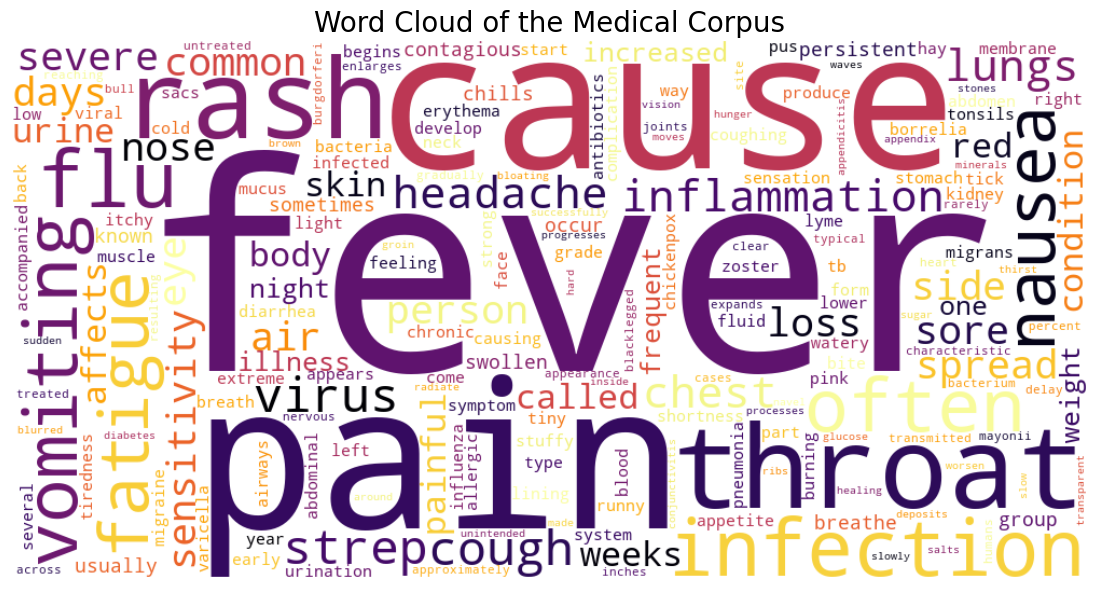

In [13]:
# --- Visualization 3: Word Cloud ---
print("Step 4: Generating Word Cloud...")

if not df.empty:
    wordcloud = WordCloud(
        width=1000,
        height=500,
        background_color='white',
        stopwords=stop_words,
        colormap='inferno',
        min_font_size=10
    ).generate(full_text)

    plt.figure(figsize=(15, 7))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title('Word Cloud of the Medical Corpus', fontsize=20)
    plt.show()
else:
    print("DataFrame is empty. Skipping word cloud generation.")

Step 5: Performing N-gram Analysis...


/var/folders/x1/gzgg2vnx04q4lfl6wr_s0_j80000gn/T/ipykernel_89979/3189201159.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Frequency', y='Ngram', data=top_df, palette='magma')


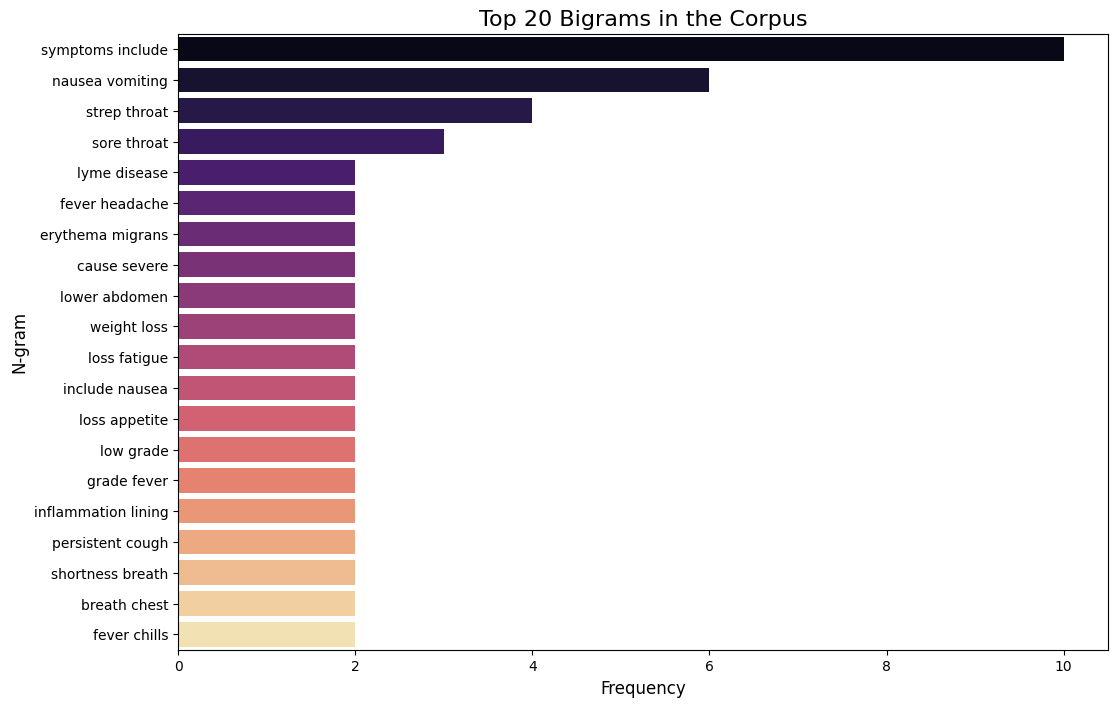

/var/folders/x1/gzgg2vnx04q4lfl6wr_s0_j80000gn/T/ipykernel_89979/3189201159.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Frequency', y='Ngram', data=top_df, palette='magma')


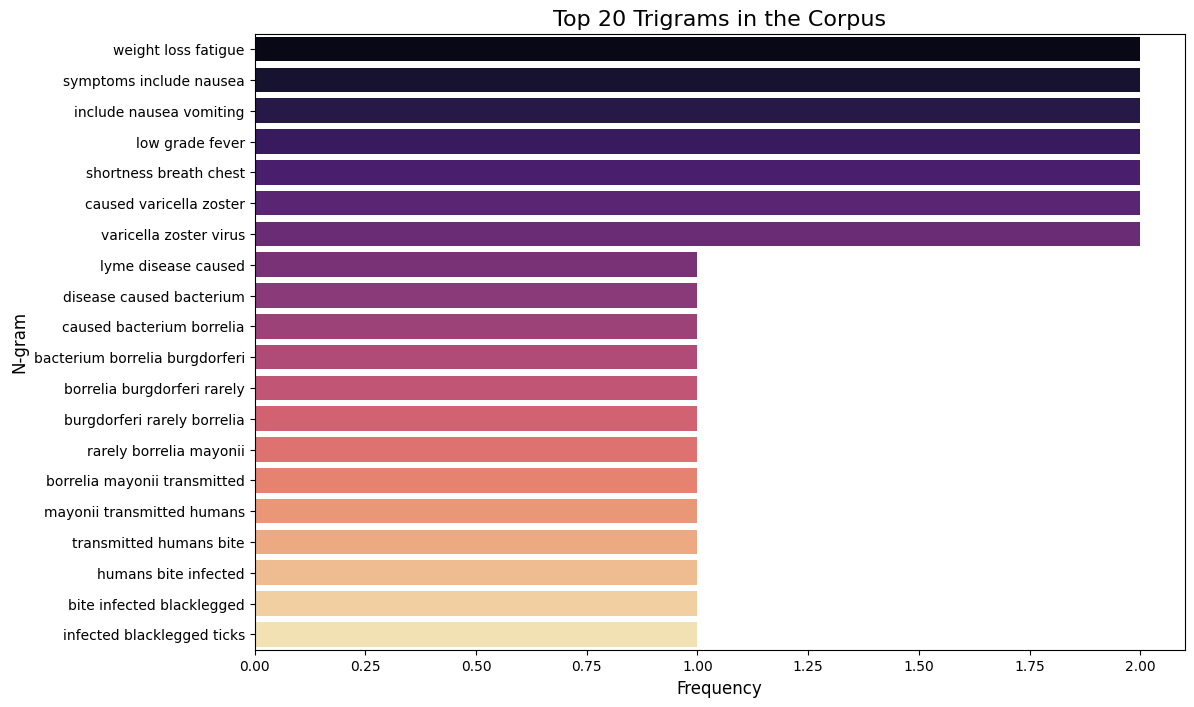

In [11]:
# ---Step 5: N-gram Analysis (Bigrams and Trigrams) ---
print("Step 5: Performing N-gram Analysis...")

def plot_top_ngrams(corpus, title, ngram_range=(2, 2), top_n=20):
    """
    Utility function to plot the top N n-grams.
    """
    try:
        vectorizer = CountVectorizer(ngram_range=ngram_range, stop_words='english').fit(corpus)
        bag_of_words = vectorizer.transform(corpus)
        sum_words = bag_of_words.sum(axis=0)
        words_freq = [(word, sum_words[0, idx]) for word, idx in vectorizer.vocabulary_.items()]
        words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)
        
        top_df = pd.DataFrame(words_freq[:top_n], columns=['Ngram', 'Frequency'])
        
        plt.figure(figsize=(12, 8))
        sns.barplot(x='Frequency', y='Ngram', data=top_df, palette='magma')
        plt.title(title, fontsize=16)
        plt.xlabel('Frequency', fontsize=12)
        plt.ylabel('N-gram', fontsize=12)
        plt.show()
    except ValueError:
        print(f"Could not generate {title}. The vocabulary might be empty after removing stopwords.")

if not df.empty:
    # Plot top 20 bigrams (2-word phrases)
    plot_top_ngrams(df['text'], 'Top 20 Bigrams in the Corpus', ngram_range=(2, 2))
    
    # Plot top 20 trigrams (3-word phrases)
    plot_top_ngrams(df['text'], 'Top 20 Trigrams in the Corpus', ngram_range=(3, 3))
else:
    print("DataFrame is empty. Skipping N-gram analysis.")

print("\n" + "="*50 + "\n")

In [19]:
# --- Step 6: TF-IDF Analysis ---
print("Step 6: Performing TF-IDF Analysis...")

def display_top_tfidf_keywords(corpus_series, top_n=10):
    """
    Fits a TF-IDF vectorizer and displays the top N keywords for each document.
    """
    # Ensure the index of the series is meaningful (disease names)
    corpus = corpus_series.tolist()
    index_names = corpus_series.index
    
    tfidf_vectorizer = TfidfVectorizer(stop_words='english')
    tfidf_matrix = tfidf_vectorizer.fit_transform(corpus)
    feature_names = tfidf_vectorizer.get_feature_names_out()
    
    for i, doc_index in enumerate(index_names):
        # Get the tfidf scores for the current document
        feature_index = tfidf_matrix[i,:].nonzero()[1]
        tfidf_scores = zip(feature_index, [tfidf_matrix[i, x] for x in feature_index])
        
        # Get the top N feature indices and scores
        top_features = sorted(tfidf_scores, key=lambda x: x[1], reverse=True)[:top_n]
        
        # Get the words for the top features
        top_keywords = [feature_names[i] for i, s in top_features]
        
        disease_name = df.loc[doc_index, 'disease_name']
        print(f"--- Top {top_n} keywords for: {disease_name} ---")
        print(", ".join(top_keywords))
        print("-" * (20 + len(disease_name)))

if not df.empty:
    # Set disease_name as the index for easier lookup
    df_indexed = df.set_index('disease_name')
    display_top_tfidf_keywords(df['text'])
else:
    print("DataFrame is empty. Skipping TF-IDF analysis.")



Step 6: Performing TF-IDF Analysis...
--- Top 10 keywords for: Lyme Disease ---
rash, lyme, borrelia, bite, infected, erythema, migrans, days, disease, bacterium
--------------------------------
--- Top 10 keywords for: Kidney Stones ---
pain, kidney, stones, hard, deposits, minerals, salts, form, inside, kidneys
---------------------------------
--- Top 10 keywords for: Diabetes Mellitus ---
increased, frequent, diabetes, processes, sugar, glucose, slowly, years, thirst, hunger
-------------------------------------
--- Top 10 keywords for: Appendicitis ---
pain, appendicitis, appendix, sudden, starts, navel, moves, worsen, progresses, bloating
--------------------------------
--- Top 10 keywords for: Conjunctivitis ---
conjunctivitis, transparent, membrane, lines, eyelid, eyeball, redness, itchiness, gritty, discharge
----------------------------------
--- Top 10 keywords for: Bronchitis ---
acute, bronchitis, bronchial, tubes, carry, typically, discomfort, low, grade, lining
--------

In [20]:
# --- NEW: Step 7: Topic Modeling with LDA ---
print("Step 7: Performing Topic Modeling with LDA...")

def display_topics(model, feature_names, no_top_words):
    """Helper function to display topics from an LDA model."""
    for topic_idx, topic in enumerate(model.components_):
        print(f"Topic {topic_idx+1}:")
        print(" | ".join([feature_names[i] for i in topic.argsort()[:-no_top_words - 1:-1]]))

if not df.empty:
    # LDA requires a document-term matrix (integer counts)
    #  use CountVectorizer here instead of TfidfVectorizer
    count_vectorizer = CountVectorizer(stop_words='english', max_df=0.95, min_df=2)
    doc_term_matrix = count_vectorizer.fit_transform(df['text'])
    
    # Define the number of topics to discover
    num_topics = 5 
    
    # Create and fit the LDA model
    lda = LatentDirichletAllocation(n_components=num_topics, random_state=42)
    lda.fit(doc_term_matrix)
    
    print(f"\nDiscovered {num_topics} topics from the corpus:\n")
    # Get the words (features) from the vectorizer
    feature_names = count_vectorizer.get_feature_names_out()
    # Display the top words for each topic
    display_topics(lda, feature_names, 10)
else:
    print("DataFrame is empty. Skipping Topic Modeling.")

print("\n" + "="*50 + "\n")

print("\nAnalysis complete.")

Step 7: Performing Topic Modeling with LDA...

Discovered 5 topics from the corpus:

Topic 1:
flu | symptoms | people | pain | lungs | cause | severe | include | nose | usually
Topic 2:
symptoms | fever | include | causes | virus | air | increased | condition | cough | sensitivity
Topic 3:
swollen | fatigue | neck | caused | occur | extreme | virus | disease | contagious | fever
Topic 4:
pain | include | symptoms | nausea | vomiting | inflammation | abdomen | lower | pink | loss
Topic 5:
rash | throat | fever | infection | caused | include | symptoms | headache | known | spread



Analysis complete.
